## Import Library

In [1]:
# Import Libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
# Load dataset
df = pd.read_csv('./datasets/data.csv', delimiter=';')

In [3]:
# Display rows
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Display descriptive statistics
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Checking missing values
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

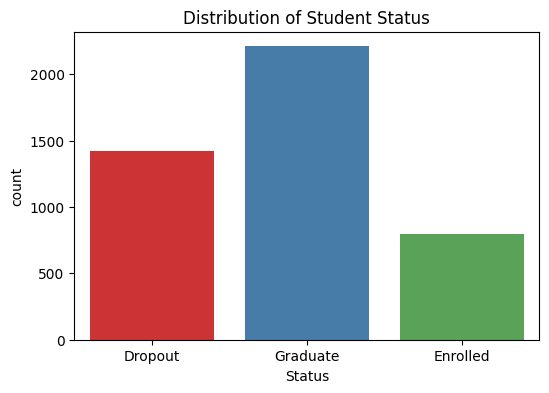

In [8]:
# Status distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status', palette='Set1')
plt.title('Distribution of Student Status')
plt.show()

## Exploratory Data Analysis (EDA)

In [9]:
# Convert numerical variables
def label_decoding(df, feature):
    """
    Decodes encoded categorical and binary features in a DataFrame into human-readable labels.
    """
    qualification_map = {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: "Higher Education - Bachelor's Degree",
        3: 'Higher Education - Degree',
        4: "Higher Education - Master's",
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd Year Complementary High School Course',
        14: '10th Year of Schooling',
        15: '10th Year of Schooling - Not Completed',
        18: 'General Commerce Course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical - Professional Course',
        25: 'Complementary High School Course - Not Concluded',
        26: '7th Year of Schooling',
        27: '2nd Cycle of the General High School Course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th Year of Schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: "Can't Read or Write",
        36: 'Can Read Without Having a 4th Year of Schooling',
        37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological Specialization Course',
        40: 'Higher Education - Degree (1st Cycle)',
        41: 'Specialized Higher Studies Course',
        42: 'Professional Higher Technical Course',
        43: 'Higher Education - Master (2nd Cycle)',
        44: 'Higher Education - Doctorate (3rd Cycle)'
    }

    occupation_map = {
        0: 'Student',
        1: 'Legislative/Executive Representatives',
        2: 'Intellectual/Scientific Professionals',
        3: 'Technicians and Associate Professionals',
        4: 'Administrative Staff',
        5: 'Personal Services and Sales Workers',
        6: 'Skilled Agricultural Workers',
        7: 'Skilled Industrial Workers',
        8: 'Machine Operators',
        9: 'Unskilled Workers',
        10: 'Armed Forces',
        90: 'Other',
        99: '(Blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces Personnel',
        112: 'Admin/Commercial Directors',
        114: 'Hospitality/Trade Directors',
        121: 'Physical Science Specialists',
        122: 'Health Professionals',
        123: 'Teachers',
        124: 'Finance/Accounting Specialists'
    }

    binary_features = [
        'Displaced', 'Educational_special_needs', 'Debtor',
        'Tuition_fees_up_to_date', 'Scholarship_holder', 'International'
    ]

    binary_map = {
        0: 'No',
        1: 'Yes'
    }

    category_mappings = {
        'Marital_status': {
            1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto Union', 6: 'Legally Separated'
        },
        'Daytime_evening_attendance': {
            0: 'Evening', 1: 'Daytime'
        },
        'Gender': {
            0: 'Female', 1: 'Male'
        },
        'Application_mode': {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
            17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        }
    }

    for f in ['Qualification', 'Previous_qualification', 'Mothers_qualification', 'Fathers_qualification']:
        category_mappings[f] = qualification_map

    for f in ['Occupation', 'Mothers_occupation', 'Fathers_occupation']:
        category_mappings[f] = occupation_map

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_map)

    return df

In [10]:
# Prepare exploration data
df_eda = df.copy()

categorical_features = [
    'Status',
    'Gender',
    'Scholarship_holder',
    'Debtor',
    'Tuition_fees_up_to_date'
]

numerical_features = [
    'Age_at_enrollment',
    'Admission_grade',
    'Curricular_units_1st_sem_grade',
    'Unemployment_rate',
    'Inflation_rate', 'GDP'
]

encoded_features = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]

df_eda = label_decoding(df_eda, encoded_features)

df_eda

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [11]:
# Saving dataframe
df_eda.to_csv('./datasets/data_dashboard.csv', index=False)

## Data Understanding

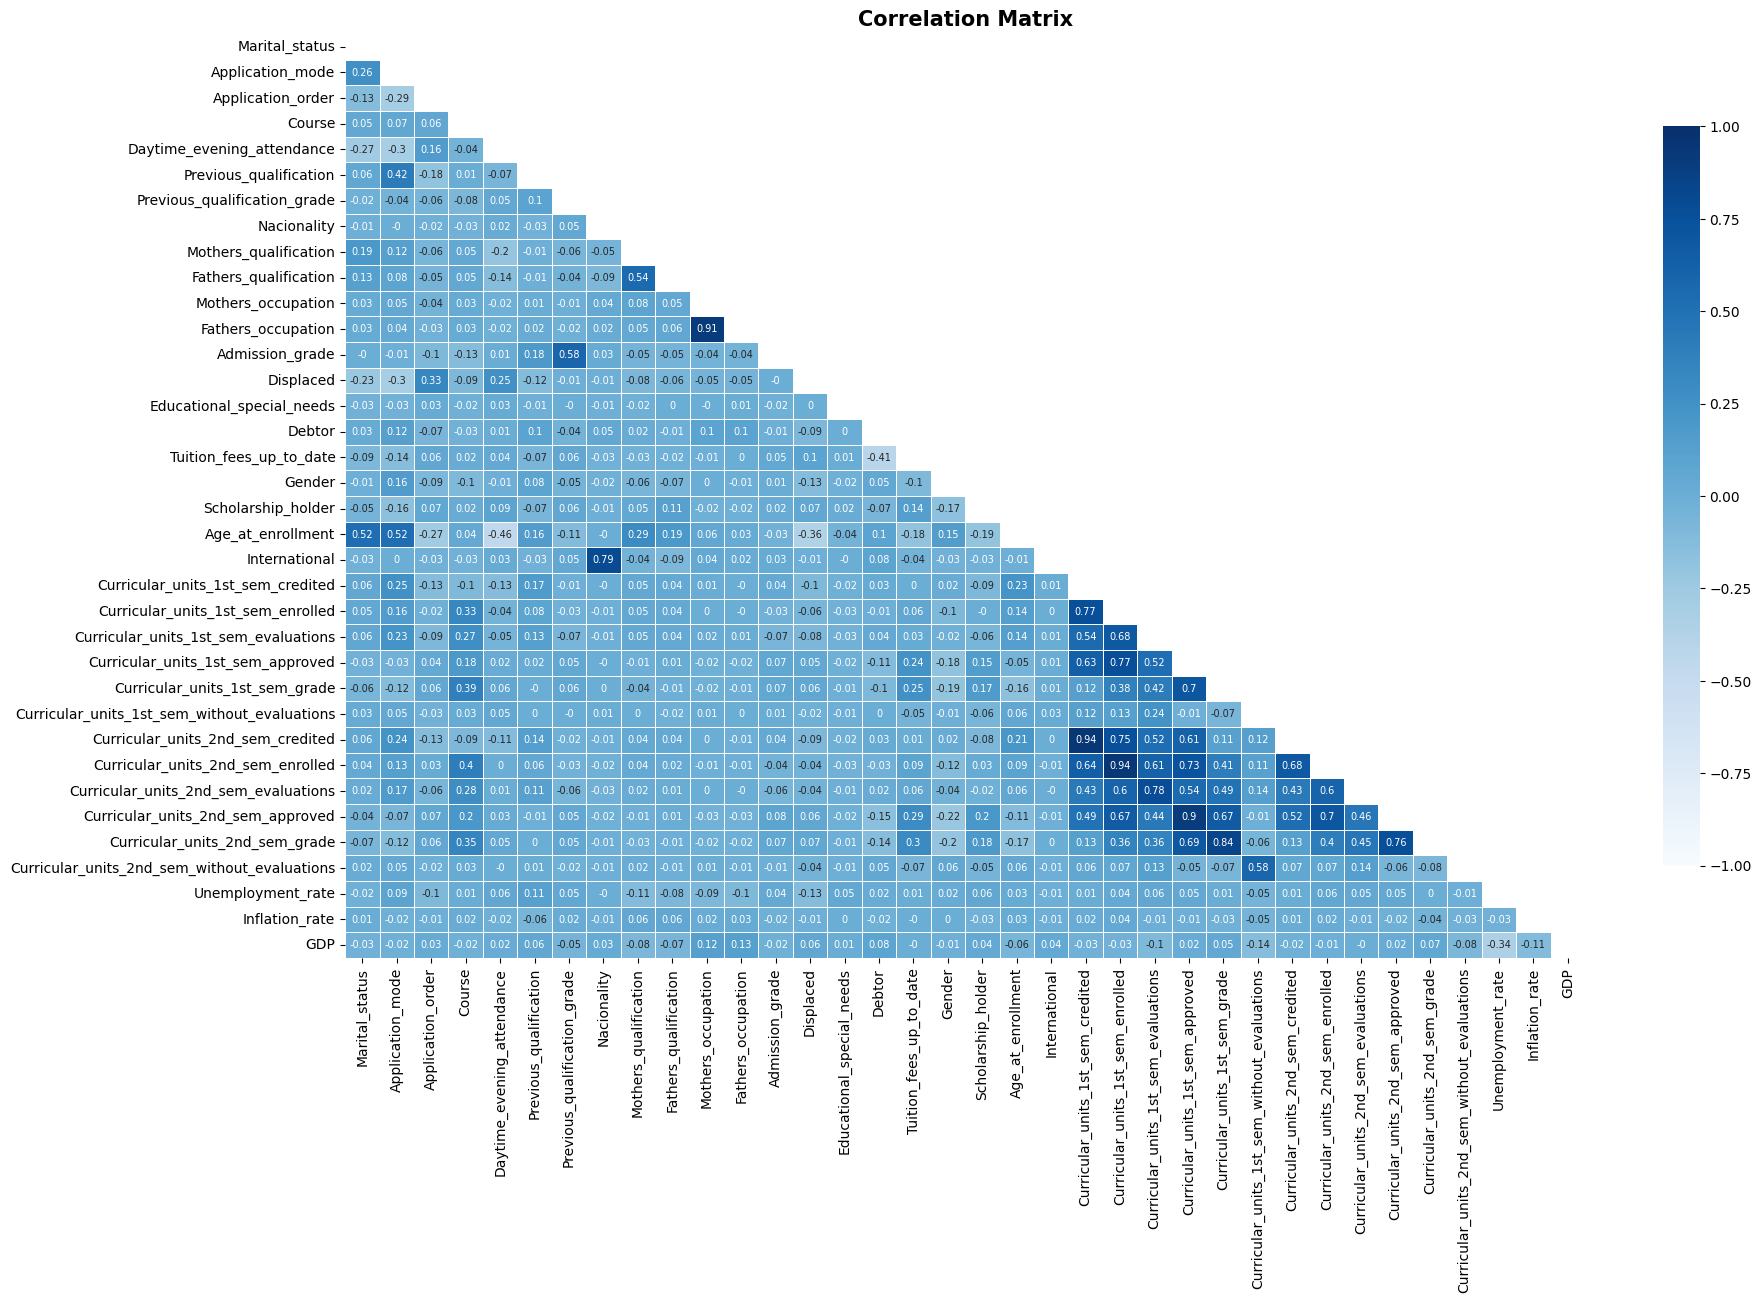

In [12]:
# Plot a heatmap
plt.figure(figsize=(20, 12))
corr_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1,
    annot=True,
    cmap='Blues',
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 7}
)

plt.title('Correlation Matrix', fontweight='bold', fontsize=15)
plt.show()


In [13]:
# This function generates a horizontal countplot with optional hue, annotated bar values, and configurable styling.
def count_plot(data, y, hue=None, title='Data', figsize=(8, 4), palette='Set2'):
    """
    Create a horizontal countplot with annotations.

    Parameters:
    - data: DataFrame, input dataset.
    - y: str, target column for y-axis.
    - hue: str or None, optional category for color coding.
    - title: str, plot title.
    - figsize: tuple, figure size.
    - palette: color palette for plot.

    Returns:
    - None, displays the plot.
    """
    plt.figure(figsize=figsize)

    colors = sns.color_palette(palette, n_colors=data[hue].nunique()) if hue else None

    ax = sns.countplot(
        data=data,
        y=y,
        hue=hue,
        palette=colors,
        order=data[y].value_counts().index
    )

    plt.title(f'Distribution of {title}', fontweight='bold', fontsize=12)
    plt.grid(axis='x', alpha=0.3)

    if hue:
        plt.legend(title=hue, loc='lower right', frameon=True, fancybox=True, shadow=True)

    max_width = max(bar.get_width() for bar in ax.patches)
    ax.set_xlim(0, max_width * 1.15)

    for bar in ax.patches:
        if bar.get_width() > 0 and bar.get_height() > 0:
            ax.annotate(
                f'{int(bar.get_width())}',
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left',
                va='center',
                xytext=(3, 0),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold'
            )

    plt.tight_layout()
    plt.show()

In [14]:
# Enhanced boxplot function for detailed EDA with options for hue, outliers, and statistics annotation
def box_plot(data, x, y, hue=None, title=None, figsize=(8, 6), palette='Set2',
             show_outliers=True, add_stats=True):
    """
    Create an enhanced boxplot with customizable features for EDA.

    Parameters:
    - data: DataFrame, the dataset to plot.
    - x: str, the column for x-axis (categorical variable).
    - y: str, the column for y-axis (numerical variable).
    - hue: str, optional, the column for hue categorization.
    - title: str, optional, custom title. If None, auto-generated.
    - figsize: tuple, the size of the figure.
    - palette: str or list, color palette to use.
    - show_outliers: bool, whether to show outliers.
    - add_stats: bool, whether to add statistical annotations.

    Returns:
    - This function does not return any value but displays a boxplot.
    """
    plt.figure(figsize=figsize)

    if hue:
        n_categories = data[hue].nunique()
    else:
        n_categories = data[x].nunique()

    if palette == 'Set2':
        colors = sns.color_palette("Set2", n_colors=n_categories)
    elif isinstance(palette, list):
        colors = palette[:n_categories]
    else:
        colors = sns.color_palette(palette, n_colors=n_categories)

    if hue:
        ax = sns.boxplot(data=data, x=x, y=y, hue=hue,
                         palette=colors,
                         showfliers=show_outliers)
    else:
        ax = sns.boxplot(data=data, x=x, y=y, hue=x,
                         palette=colors,
                         showfliers=show_outliers,
                         legend=False)

    if title is None:
        if hue:
            title = f'Distribution of {y} by {x} and {hue}'
        else:
            title = f'Distribution of {y} by {x}'

    plt.title(title, fontweight='bold', fontsize=12, pad=20)
    plt.grid(axis='y', alpha=0.3, linestyle='--')

    plt.xlabel(x.replace('_', ' ').title(), fontweight='bold')
    plt.ylabel(y.replace('_', ' ').title(), fontweight='bold')

    if hue:
        plt.legend(title=hue.replace('_', ' ').title(),
                  loc='best', frameon=True, fancybox=True, shadow=True)

    if add_stats and not hue:
        medians = data.groupby(x)[y].median()
        for i, category in enumerate(data[x].unique()):
            median_val = medians[category]
            ax.text(i, median_val, f'Med: {median_val:.1f}',
                   ha='center', va='bottom', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    x_labels = [str(label) for label in data[x].unique()]
    max_label_length = max(len(label) for label in x_labels)

    if max_label_length > 8 or len(x_labels) > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


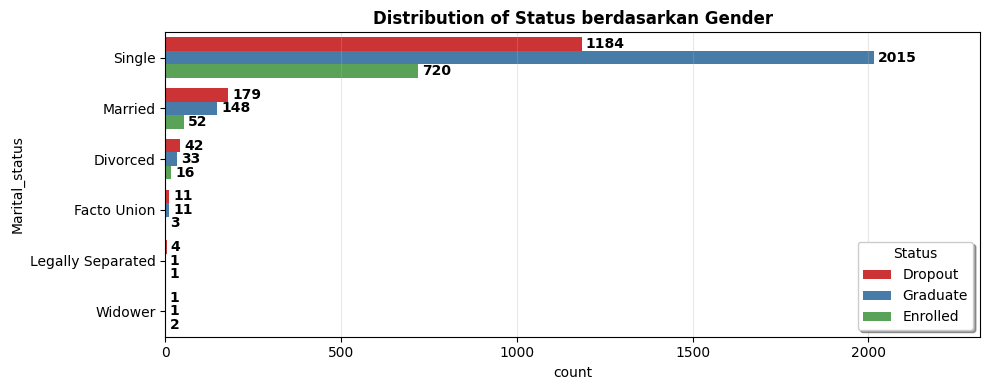

In [15]:
# Plot the distribution of 'Marital status' grouped by 'Status' with custom title and size
count_plot(df_eda, 'Marital_status', 'Status', 'Status berdasarkan Gender', (10, 4), palette='Set1')

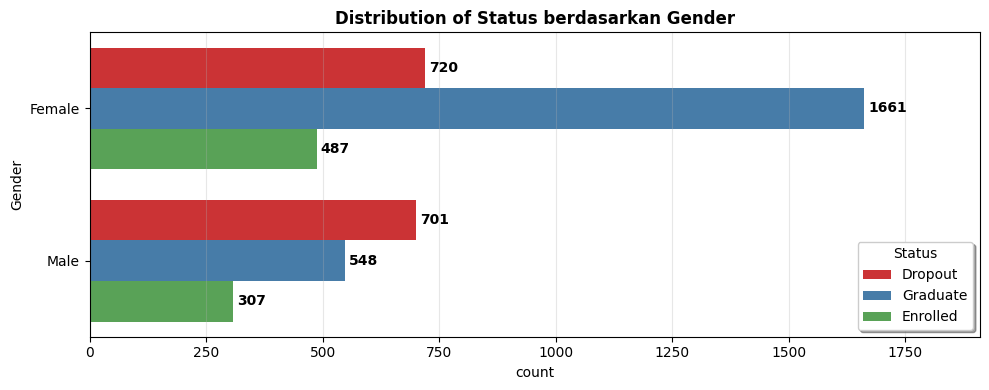

In [16]:
# Plot the distribution of 'Gender' grouped by 'Status' with custom title and size
count_plot(df_eda, 'Gender', 'Status', 'Status berdasarkan Gender', (10, 4), palette='Set1')

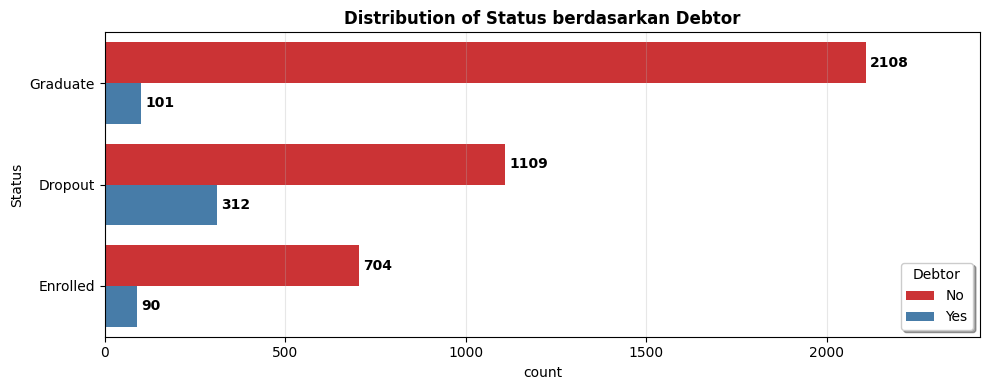

In [17]:
# Plot the distribution of 'Status' grouped by 'Debtor' with custom title and size
count_plot(df_eda, 'Status', 'Debtor', 'Status berdasarkan Debtor', (10, 4), palette='Set1')

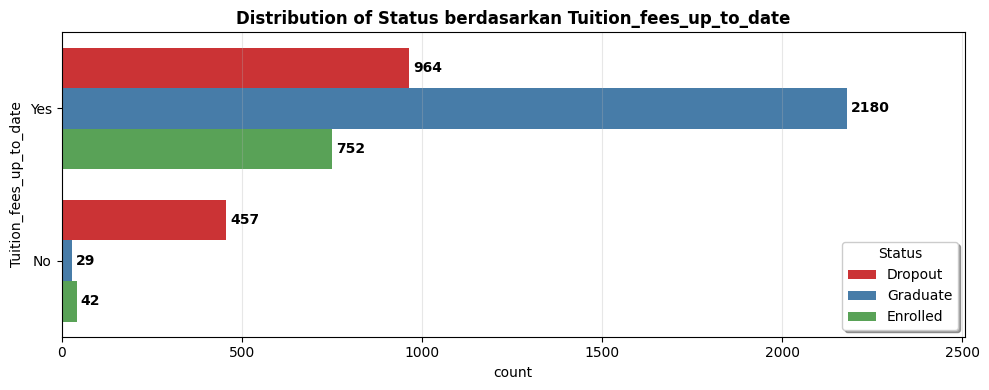

In [18]:
# Plot the distribution of 'Tuition fees up to date' grouped by 'Status' with custom title and size
count_plot(df_eda, 'Tuition_fees_up_to_date', 'Status', 'Status berdasarkan Tuition_fees_up_to_date', (10, 4), palette='Set1')

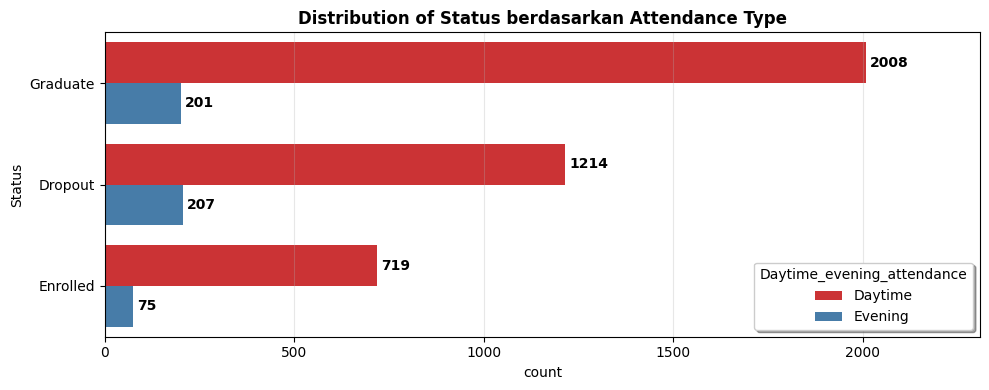

In [19]:
# Plot the distribution of 'Status' grouped by 'Daytime evening attendance' with custom title and size
count_plot(df_eda, 'Status', 'Daytime_evening_attendance', 'Status berdasarkan Attendance Type', (10, 4), palette='Set1')

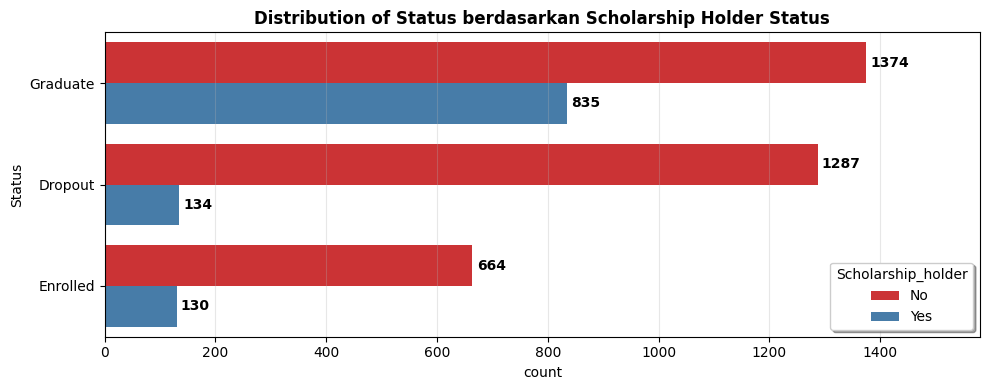

In [20]:
# Plot the distribution of 'Status' grouped by 'Scholarship holder' with custom title and size
count_plot(df_eda, 'Status', 'Scholarship_holder', 'Status berdasarkan Scholarship Holder Status', (10, 4), palette='Set1')

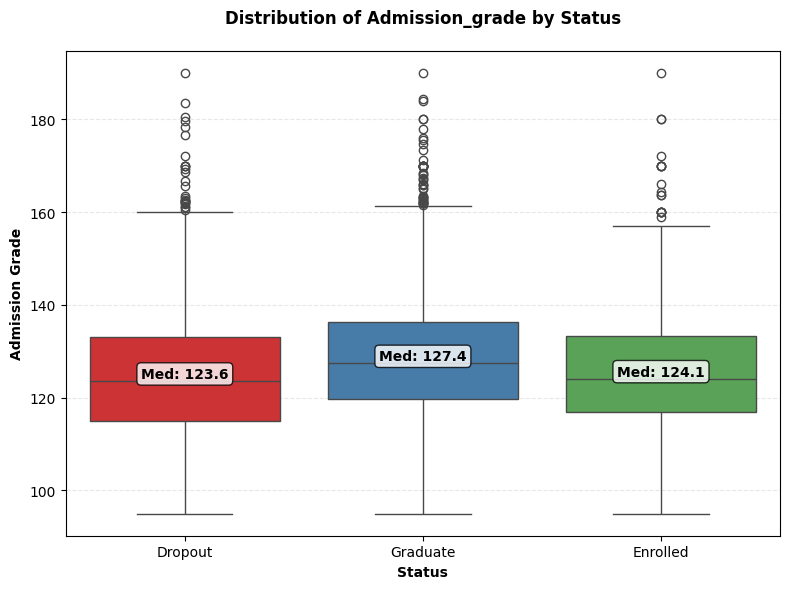

In [21]:
# Display boxplot of Admission grade grouped by Status
box_plot(df_eda, 'Status', 'Admission_grade', palette='Set1')

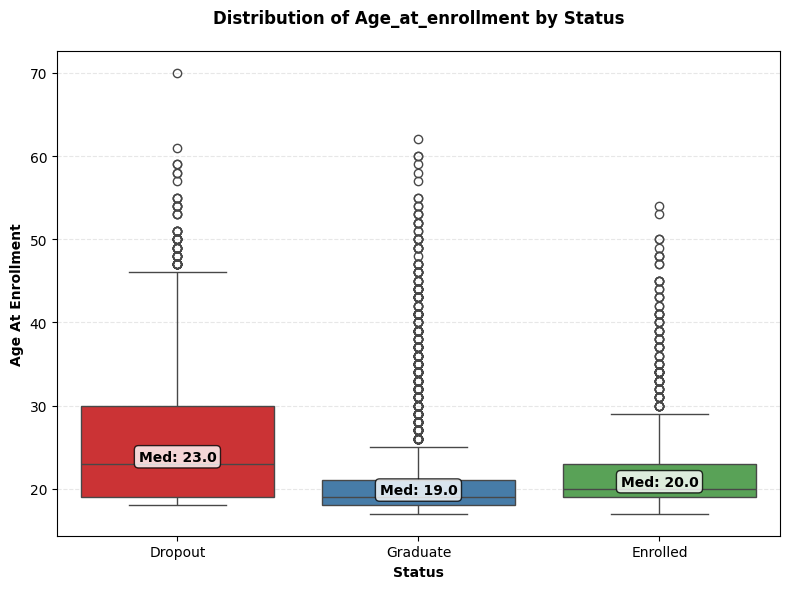

In [22]:
# Display boxplot of Age at enrollment grouped by Status
box_plot(df_eda, 'Status', 'Age_at_enrollment', palette='Set1')

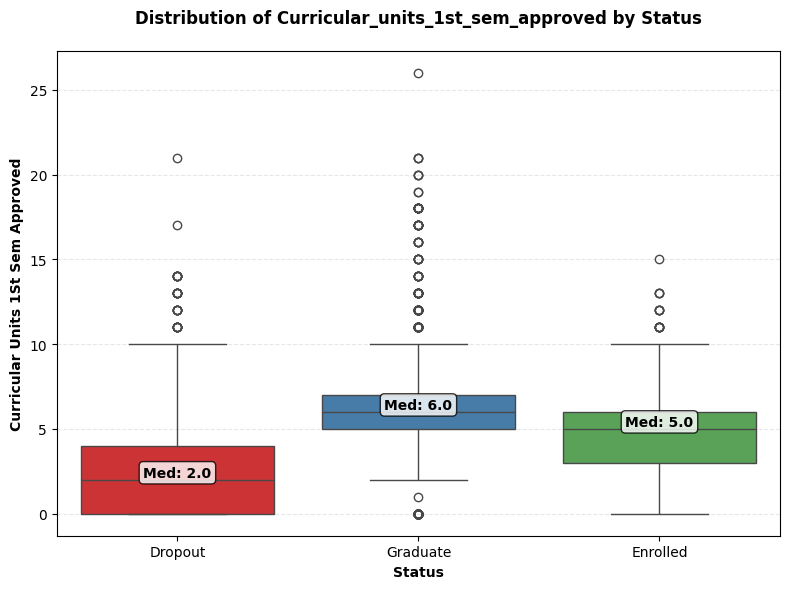

In [23]:
# Display boxplot of Curricular units 1st sem approved grouped by Status
box_plot(df_eda, 'Status', 'Curricular_units_1st_sem_approved', palette='Set1')

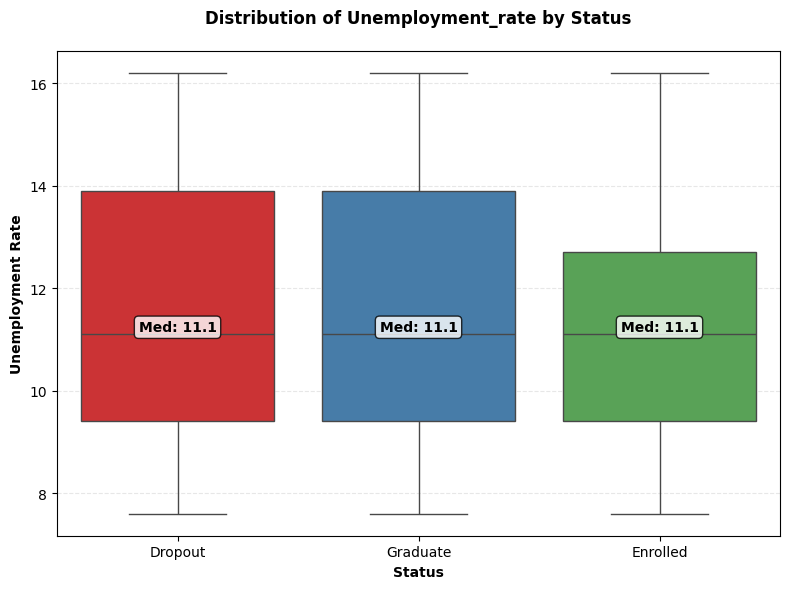

In [24]:
# Display boxplot of Unemployment rate grouped by Status
box_plot(df_eda, 'Status', 'Unemployment_rate', palette='Set1')

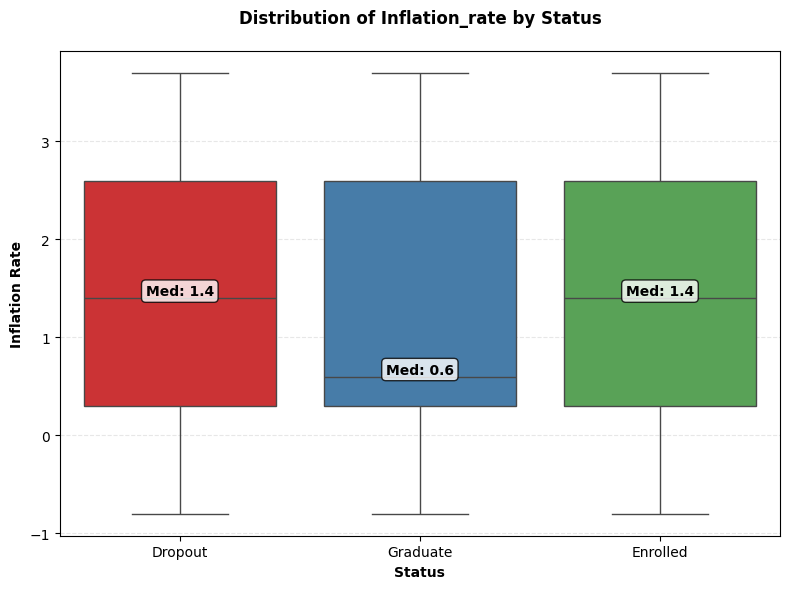

In [25]:
# Display boxplot of Inflation rate grouped by Status
box_plot(df_eda, 'Status', 'Inflation_rate', palette='Set1')

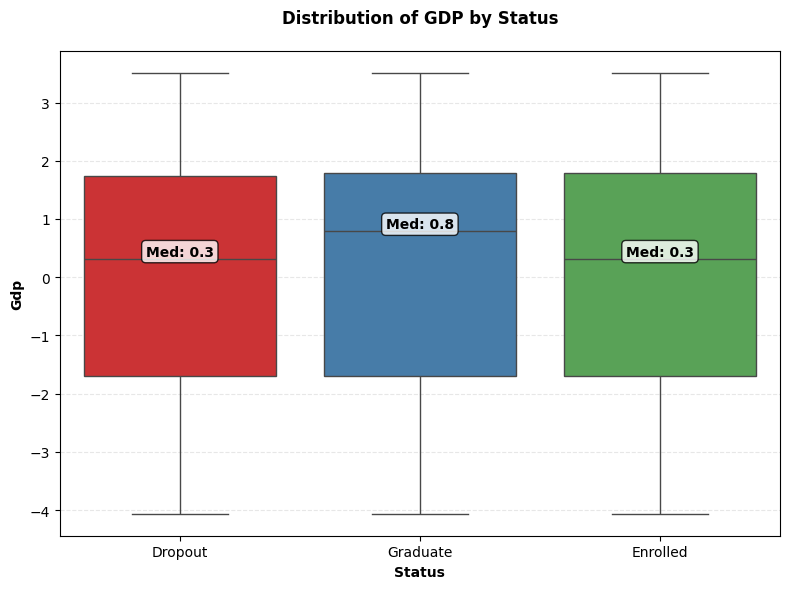

In [26]:
# Display boxplot of GDP grouped by Status
box_plot(df_eda, 'Status', 'GDP', palette='Set1')

## Data Preprocessing

In [27]:
# Set of preprocessing functions
def encode_status(df):
    le = LabelEncoder()
    df['Status'] = le.fit_transform(df['Status'])
    mapping = {str(cls): int(label) for cls, label in zip(le.classes_, le.transform(le.classes_))}
    print("Label Encoding:", mapping)
    return df

def filter_and_relabel(df):
    df = df[df['Status'] != 1].reset_index(drop=True)
    df['Status'] = df['Status'].replace({2: 1})
    mapping = {'Dropout': 0, 'Graduate': 1}
    print("Label Encoding after relabeling:", mapping)
    return df

def select_correlated_features(df, threshold=0.1):
    corr = df.corr()['Status'].abs()
    filtered_df = df.loc[:, corr.ge(threshold)]
    return filtered_df

def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    summary = pd.DataFrame({
        'Original': collections.Counter(y),
        'SMOTE': collections.Counter(y_resampled)
    })
    summary.loc['Total'] = [sum(summary['Original']), sum(summary['SMOTE'])]
    return X_resampled, y_resampled, summary

def save_model(model, save_path):
    with open(save_path, 'wb') as f:
        pickle.dump(model, f)

In [28]:
# Execute the main process
df = encode_status(df)
df = filter_and_relabel(df)
df_filtered = select_correlated_features(df)
save_model(df_filtered, './models/preprocessing.pkl')

Label Encoding: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
Label Encoding after relabeling: {'Dropout': 0, 'Graduate': 1}


In [29]:
# Split and resampling
X = df_filtered.drop('Status', axis=1)
y = df_filtered['Status']

X_smote, y_smote, df_comparison = apply_smote(X, y)
print(df_comparison)

       Original  SMOTE
0          1421   2209
1          2209   2209
Total      3630   4418


In [30]:
# Split test, train and normalization
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [31]:
# Define function
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def show_classification_report(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Testing Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

def show_confusion_matrix(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='rocket_r')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

def show_feature_importance(model, feature_names, model_name="Model"):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
        plt.title(f'Feature Importance - {model_name}')
        plt.show()
    else:
        print(f"{model_name} does not support feature importances.")

In [32]:
# Train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = train_model(dt_model, X_train, y_train)

In [33]:
# Classification report decision tree
show_classification_report(dt_model, X_test, y_test, model_name="Decision Tree")

Decision Tree - Testing Accuracy: 0.8665
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       442
           1       0.88      0.85      0.86       442

    accuracy                           0.87       884
   macro avg       0.87      0.87      0.87       884
weighted avg       0.87      0.87      0.87       884



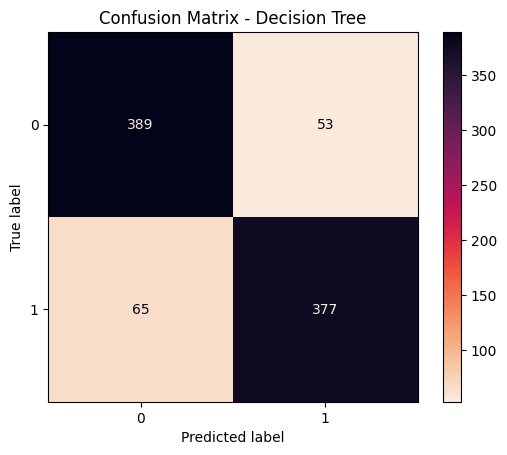

In [34]:
# Confusion matrix decision tree
show_confusion_matrix(dt_model, X_test, y_test, model_name="Decision Tree")

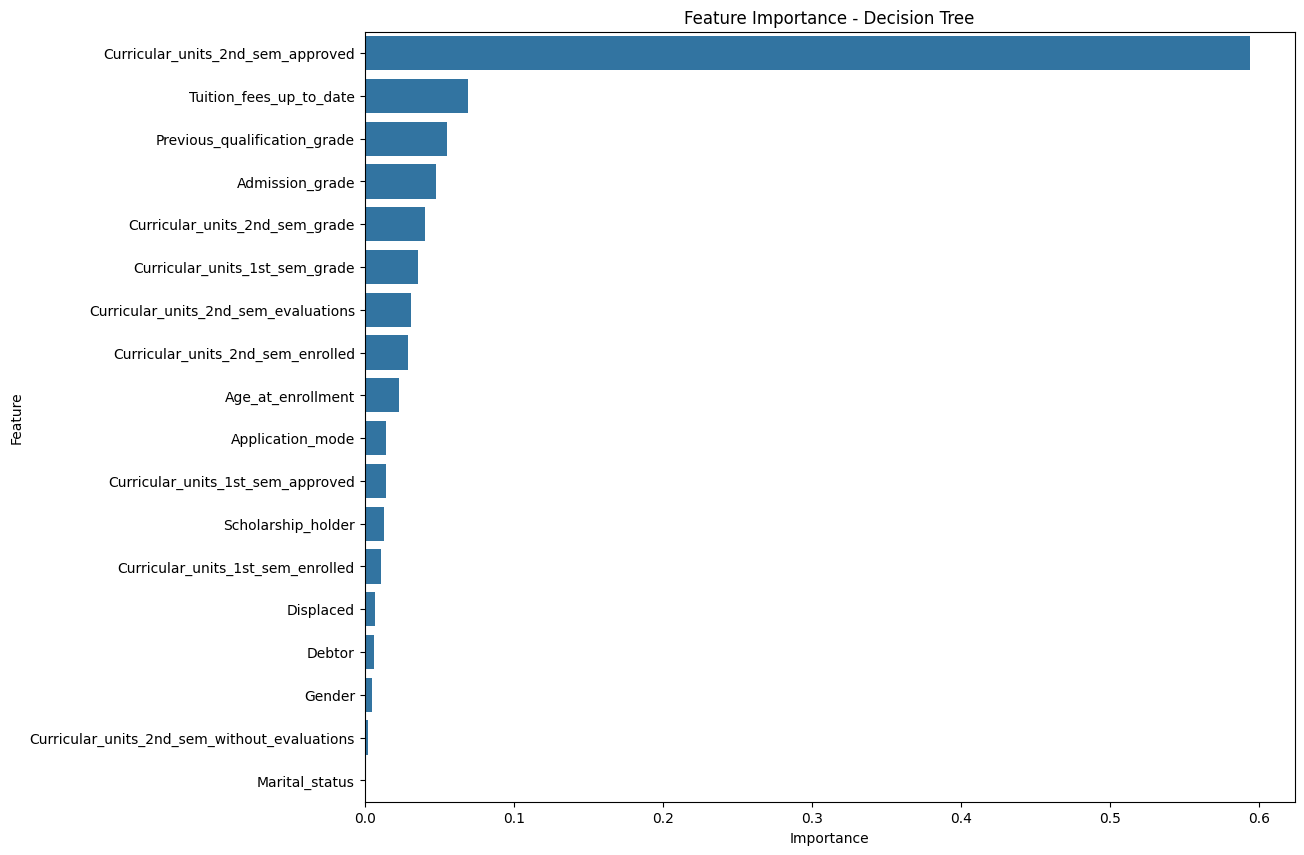

In [35]:
# Feature importance decision tree
show_feature_importance(dt_model, X.columns, model_name="Decision Tree")

In [36]:
# Save model decision tree
save_model(dt_model, './models/decision_tree_model.pkl')

In [37]:
# Train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = train_model(rf_model, X_train, y_train)

In [38]:
# Classification report random forest
show_classification_report(rf_model, X_test, y_test, model_name="Random Forest")

Random Forest - Testing Accuracy: 0.9072
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       442
           1       0.88      0.94      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



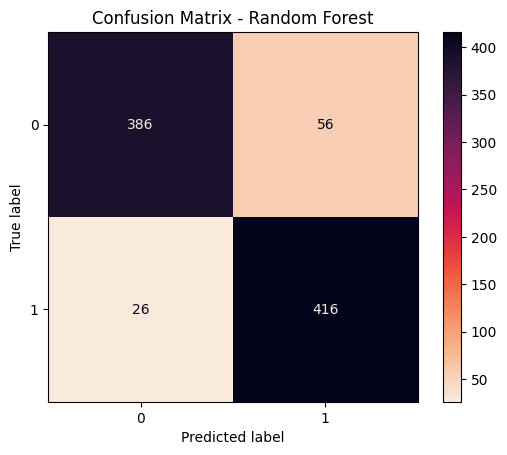

In [39]:
# Confusion matrix random forest
show_confusion_matrix(rf_model, X_test, y_test, model_name="Random Forest")

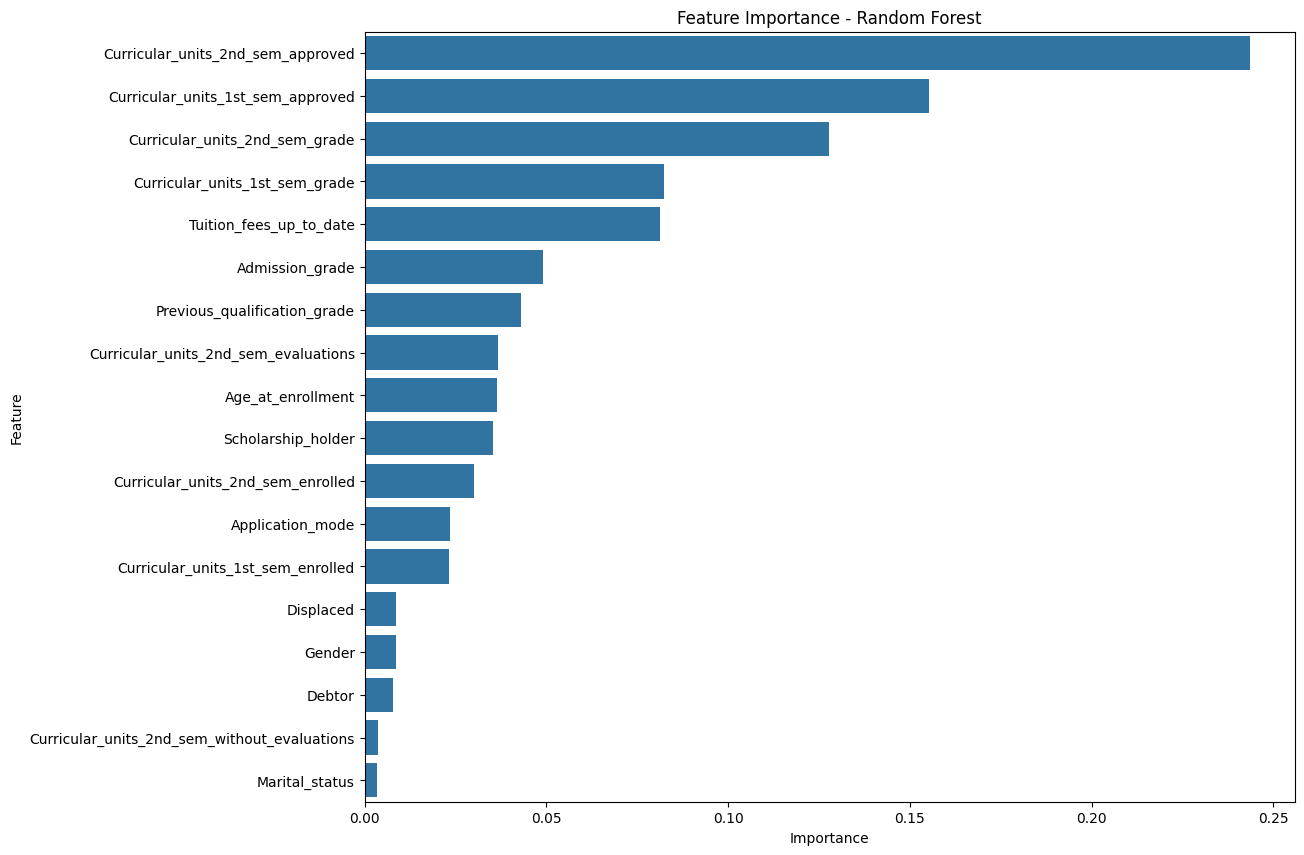

In [40]:
# Feature importance random forest
show_feature_importance(rf_model, X.columns, model_name="Random Forest")

In [41]:
# Save model random forest
save_model(rf_model, './models/random_forest_model.pkl')